# **Exercise - Logistic Regression**
# DATA 3300

## Name: Chance Wiese


#Q1

**Using the (full) voters.csv dataset, conduct a logistic regression analysis in Python. Assume the data set has already been checked for collinear independent variables, and found none.**

Be sure to:
* Load in required libraries and import dataset
* Dummy code all categorical variables, leaving out a reference group
* Dummy code DV variable
* Create an object for your IVs ('x') and an object for your DV ('y')
* Exclude unwanted variables from analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
# read in and display the dataset
df = pd.read_csv('/content/voters.csv')
df

,ResponseID,Age,IncomeCat,MStatus,Religion,Homeowner,Defense,Healthcare,Privacy,Education,VIntent
0,1,61,2,married,Agnostic,y,3,3,4,2,Kang
1,2,26,1,married,Christian,n,2,5,3,4,Kang
2,3,28,2,divorced,Jewish,n,2,3,1,5,Kodos
3,4,23,1,married,Christian,n,3,1,3,2,Kodos
4,5,25,2,married,Christian,y,5,3,3,2,Kodos
...,...,...,...,...,...,...,...,...,...,...,...
293,294,40,1,married,Other,n,3,5,4,2,Kodos
294,295,42,2,divorced,Other,n,4,1,5,2,Kodos
295,296,47,5,married,Agnostic,y,1,2,3,5,Kodos
296,297,47,1,divorced,Christian,n,4,3,1,1,Kodos


In [4]:
df['Religion'].value_counts()

Christian    137
Agnostic      78
Other         39
Jewish        24
Muslim        20
Name: Religion, dtype: int64

In [5]:
x = df.drop(['ResponseID', 'VIntent'], axis=1)         # replace with code to remove vars that shouldn't be included in x
x = pd.get_dummies(data = x, drop_first = True)   # dummy codes categorical IVs
#replace with code to preview this x object
x.head()

,Age,IncomeCat,Defense,Healthcare,Privacy,Education,MStatus_married,MStatus_single,MStatus_widowed,Religion_Christian,Religion_Jewish,Religion_Muslim,Religion_Other,Homeowner_y
0,61,2,3,3,4,2,1,0,0,0,0,0,0,1
1,26,1,2,5,3,4,1,0,0,1,0,0,0,0
2,28,2,2,3,1,5,0,0,0,0,1,0,0,0
3,23,1,3,1,3,2,1,0,0,1,0,0,0,0
4,25,2,5,3,3,2,1,0,0,1,0,0,0,1


In [6]:
y = df['VIntent'] # replace with code to create y object
y = pd.get_dummies(data = y, drop_first = True) # replace with code to fill in get_dummies parameters
y

,Kodos
0,0
1,0
2,1
3,1
4,1
...,...
293,1
294,1
295,1
296,1


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=101) # sets a test and training split

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(238, 14)
(60, 14)
(238, 1)
(60, 1)


In [8]:
x_train_Sm = sm.add_constant(x_train) # adds a constant (y-intercept) to x_train
log_reg = sm.Logit(y_train, x_train_Sm).fit() # fits a Logit model
# replace with code to print the summary
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Kodos   No. Observations:                  238
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                           14
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                     inf
Time:                        19:42:33   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0556      1.223      3.315      0.001       1.658       6.454
Age       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


## 1A
**Are there any *non-significant* variables at the α = 0.1 level? State how you know this (list the metric, its value, and its interpretation).**

***Note that if one class of a categorical variable is significant, the entire variable is significant.***

Defense has a p value of 0.531, higher than our a = 0.1 value, making it not statisically significant.

## 1B
**If all of the IVs had a value of 0, for which candidate would the model predict a voter would intend to vote? How do we know this?**

If all the IVs were set to 0, that voter would be more likely (greater than 50%) to vote for Kodos than Kang. We know this because the intercept value has a log-odds above 0.

## 1C

**The reference group for Marital Status is divorced. Are married individuals significantly different in their likelihood of voting for Kodos as compared to divorced individuals? How do you know this, and are they more or less likely on average to vote for Kodos?**

There is a statistically significant difference in the likelihood of married and divorced individuals to vote for Kodos (p < 0.1). Married individuals are significantly less likely to vote for Kodos compared to Divorced individuals, indicated by the negative log-odds of the coefficient (about -1.0).

## 1D
**Rerun the model dropping out any non-significant variables, then produce the summary table.**

In [9]:
x_train_Sm = x_train_Sm.drop(['Defense'], axis=1) # add in var name to be dropped
log_reg = sm.Logit(y_train, x_train_Sm).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Kodos   No. Observations:                  238
Model:                          Logit   Df Residuals:                      224
Method:                           MLE   Df Model:                           13
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                     inf
Time:                        19:42:33   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3016      1.166      3.689      0.000       2.016       6.587
Age       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


## 1E
**Using the coefficients, write out the full model in equation form.**

$Logit_{VIntent_Kodos} = 4.3016 - Age*0.0410 - IncomeCat*0.7262 - Healthcare*0.5527 + Privacy*0.3253 + Education*0.6280 - MStatus_married*1.0036 + MStatus_single*1.0926 - MStatus_widowed*2.0613 - Religion_Christian*1.6095 - Religion_Jewish*0.4361 - Religion_Muslim*1.4138 - Religion_Other*1.2881 - Homeowner_y*1.1718$

# Q2

**Consider a voter who is Jewish, single, owns a home, 40 years old, falls into Income Category 4, and is lukewarm on the importance of defense, healthcare, privacy, and education (i.e., has a value of "3" for each of these).**

## 2A
**What would be the *log-odds* of this voter voting for Kodos? (Show the equation you used for this calculation; perform this calculation using your formula)**

In [10]:
Logit_Kodos = 4.3016 - (40*0.0410) - (4*0.7262) - (3*0.5527) + (3*0.3253) + (3*0.6280) - (0*1.0036) + (1*1.0926) - (0*2.0613) - (0*1.6095) - (1*0.4361) - (0*1.4138) - (0*1.2881) - (1*1.1718)
print("Logit(Kodos) =", Logit_Kodos)

Logit(Kodos) = 0.4432999999999998


## 2B

**What would be the *odds* of this voter voting for Kodos? (Show your formula; use 2.718 as the value of $e$.)**

In [11]:
odds = 2.718 ** 0.443
print("odds(Kodos) =", odds)

odds(Kodos) = 1.5573008025528459


In [12]:
np.exp(0.443)# using np.exp

1.5573723343417794

## 2C

**What would be the *probability* of this voter voting for Kodos? (Show your formula).**

In [13]:
p = odds/(1 + odds)
print("P(Kodos) = ", p)

P(Kodos) =  0.6089627004372179


The probability of this individual voting for Kodos is about 61%, meaning they are more likely to vote for Kodos than for Kang

# Q3
**Now that we've interpretted our model, let's see how it performs on the test set to get an idea of how accurate our model would be in predicting the voter intent of new voters.**

In [14]:
x_test = x_test.drop(['Defense'], axis=1) # which variable(s) need(s) to be dropped from x_test?
# replace with code to add a constant to x_test
x_test_Sm = sm.add_constant(x_test)

In [ ]:
model = LogisticRegression() # brings in LogisticRegression predictive model from sklearn
model.fit(x_train_Sm, y_train) # fits the model to the training data

predictions = model.predict(x_test_Sm) # make predictions onto x_test_Sm
predictions

In [ ]:
print(classification_report(y_test, predictions)) # replace with code to add in parameters

# Q4

**Develop a data visualization illustrating which candidate received the majority of votes from voters in this dataset. Provide a caption for your figure.**

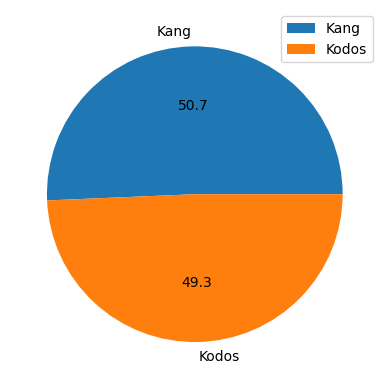

In [17]:
# create a voter_counts object to display in a pie chart
voter_counts = df['VIntent'].value_counts()
plt.pie(voter_counts.values, labels = voter_counts.index.values, autopct = '%1.1f')
plt.legend()
plt.show()

Breakdown of Voter Intent - Indicating Kang as the likely winner